# Business Case:

- FicZon Inc is an IT solution provider with products ranging from on- premises products to SAAS based solutions.  - FicZon major leads generation channel is digital and through their website.
- FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.
- Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.
- FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

# PROJECT GOAL:

1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low
Potential)

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
df= pd.read_csv("sales data.csv")

In [3]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


# EDA

# Tableau Link:- https://public.tableau.com/app/profile/ayush.mehta/viz/ClientProjectstory/Story1

### A thorough analysis of the data has been done on tableau please have a look at the above link.

# Overview of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


# Value counts of each data

In [7]:
df.count().iplot(kind='bar')

# Status count

<AxesSubplot:xlabel='Status', ylabel='count'>

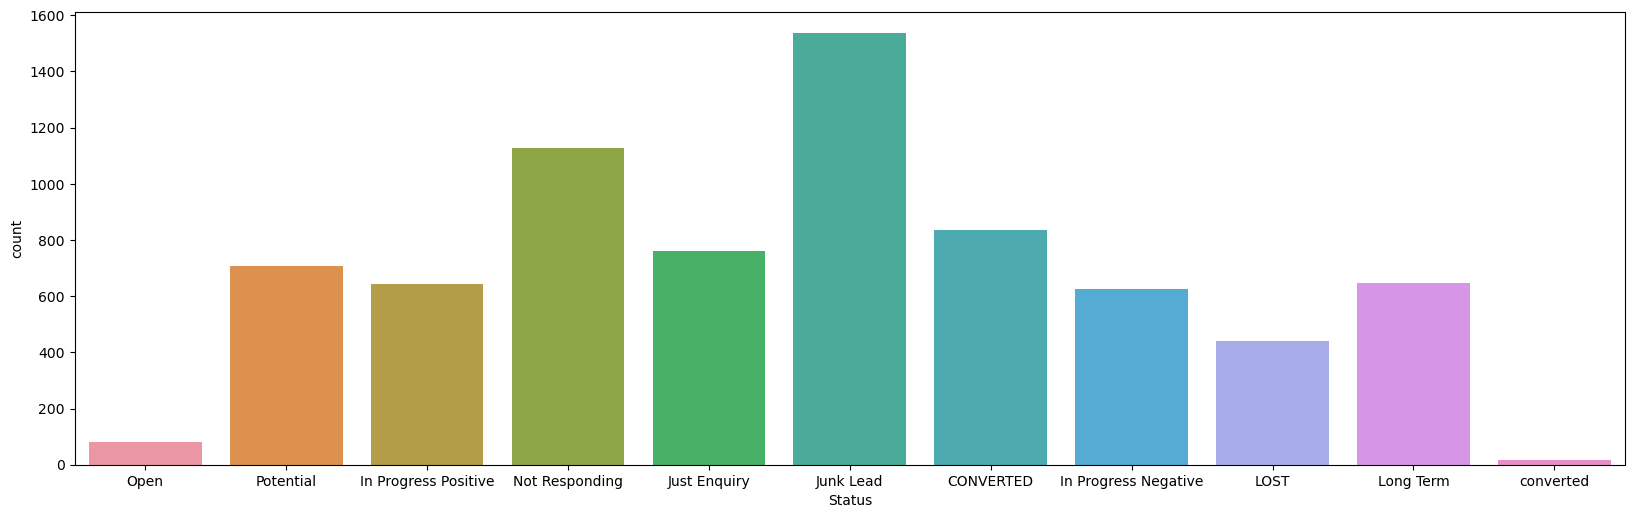

In [8]:
fig = plt.figure(figsize=(20,6), dpi=100)
sns.countplot(x='Status',data=df)

# Sales agent count

<AxesSubplot:xlabel='Sales_Agent', ylabel='count'>

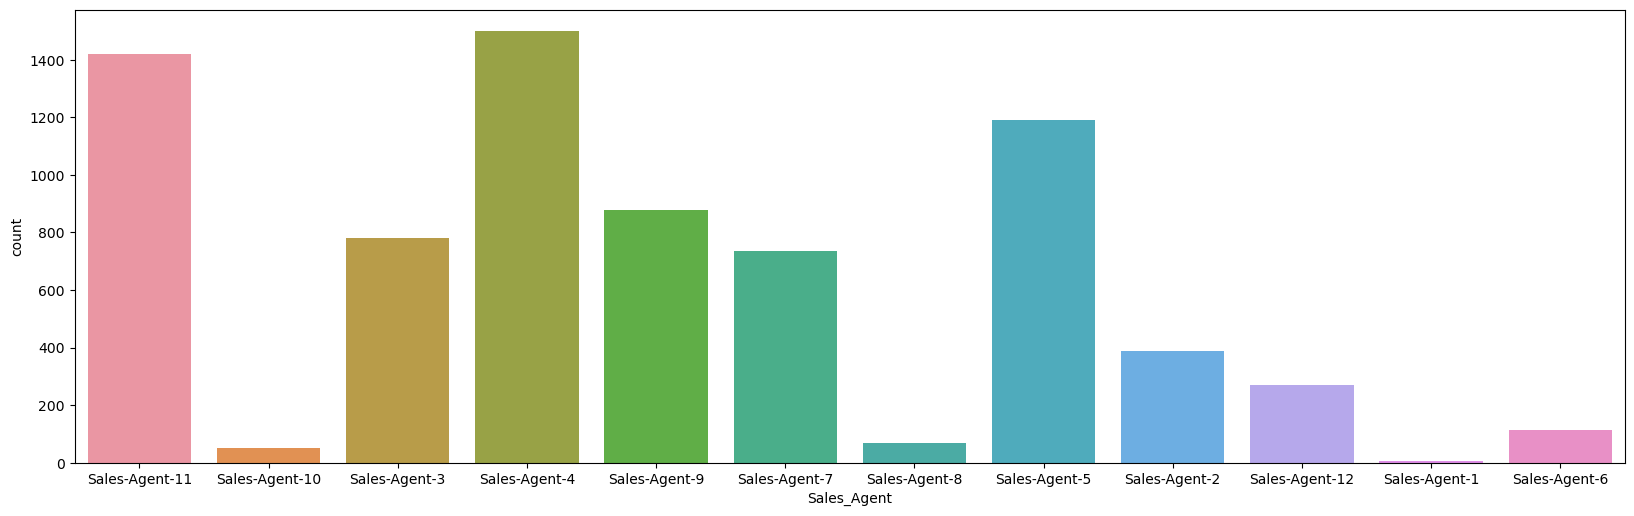

In [9]:
fig = plt.figure(figsize=(20,6), dpi=100)
sns.countplot(x='Sales_Agent',data=df)

# Location count

<AxesSubplot:xlabel='Location', ylabel='count'>

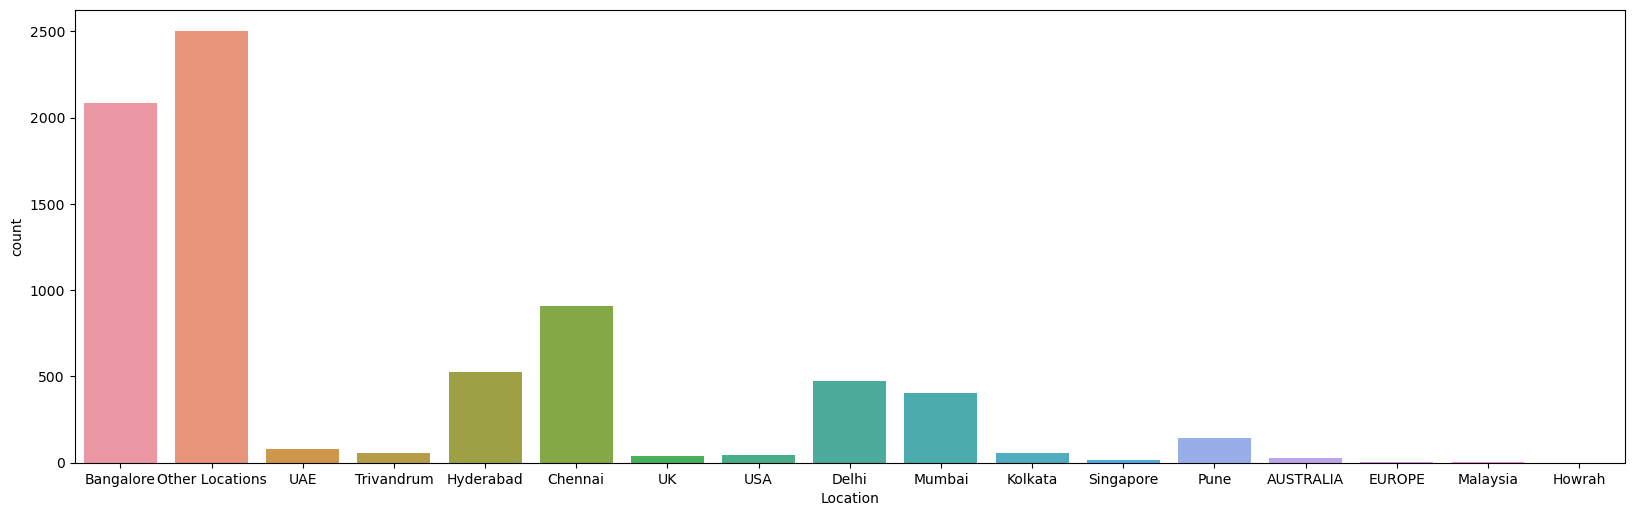

In [10]:
fig = plt.figure(figsize=(20,6), dpi=100)
sns.countplot(x='Location',data=df)

# Source count

<AxesSubplot:xlabel='Source', ylabel='count'>

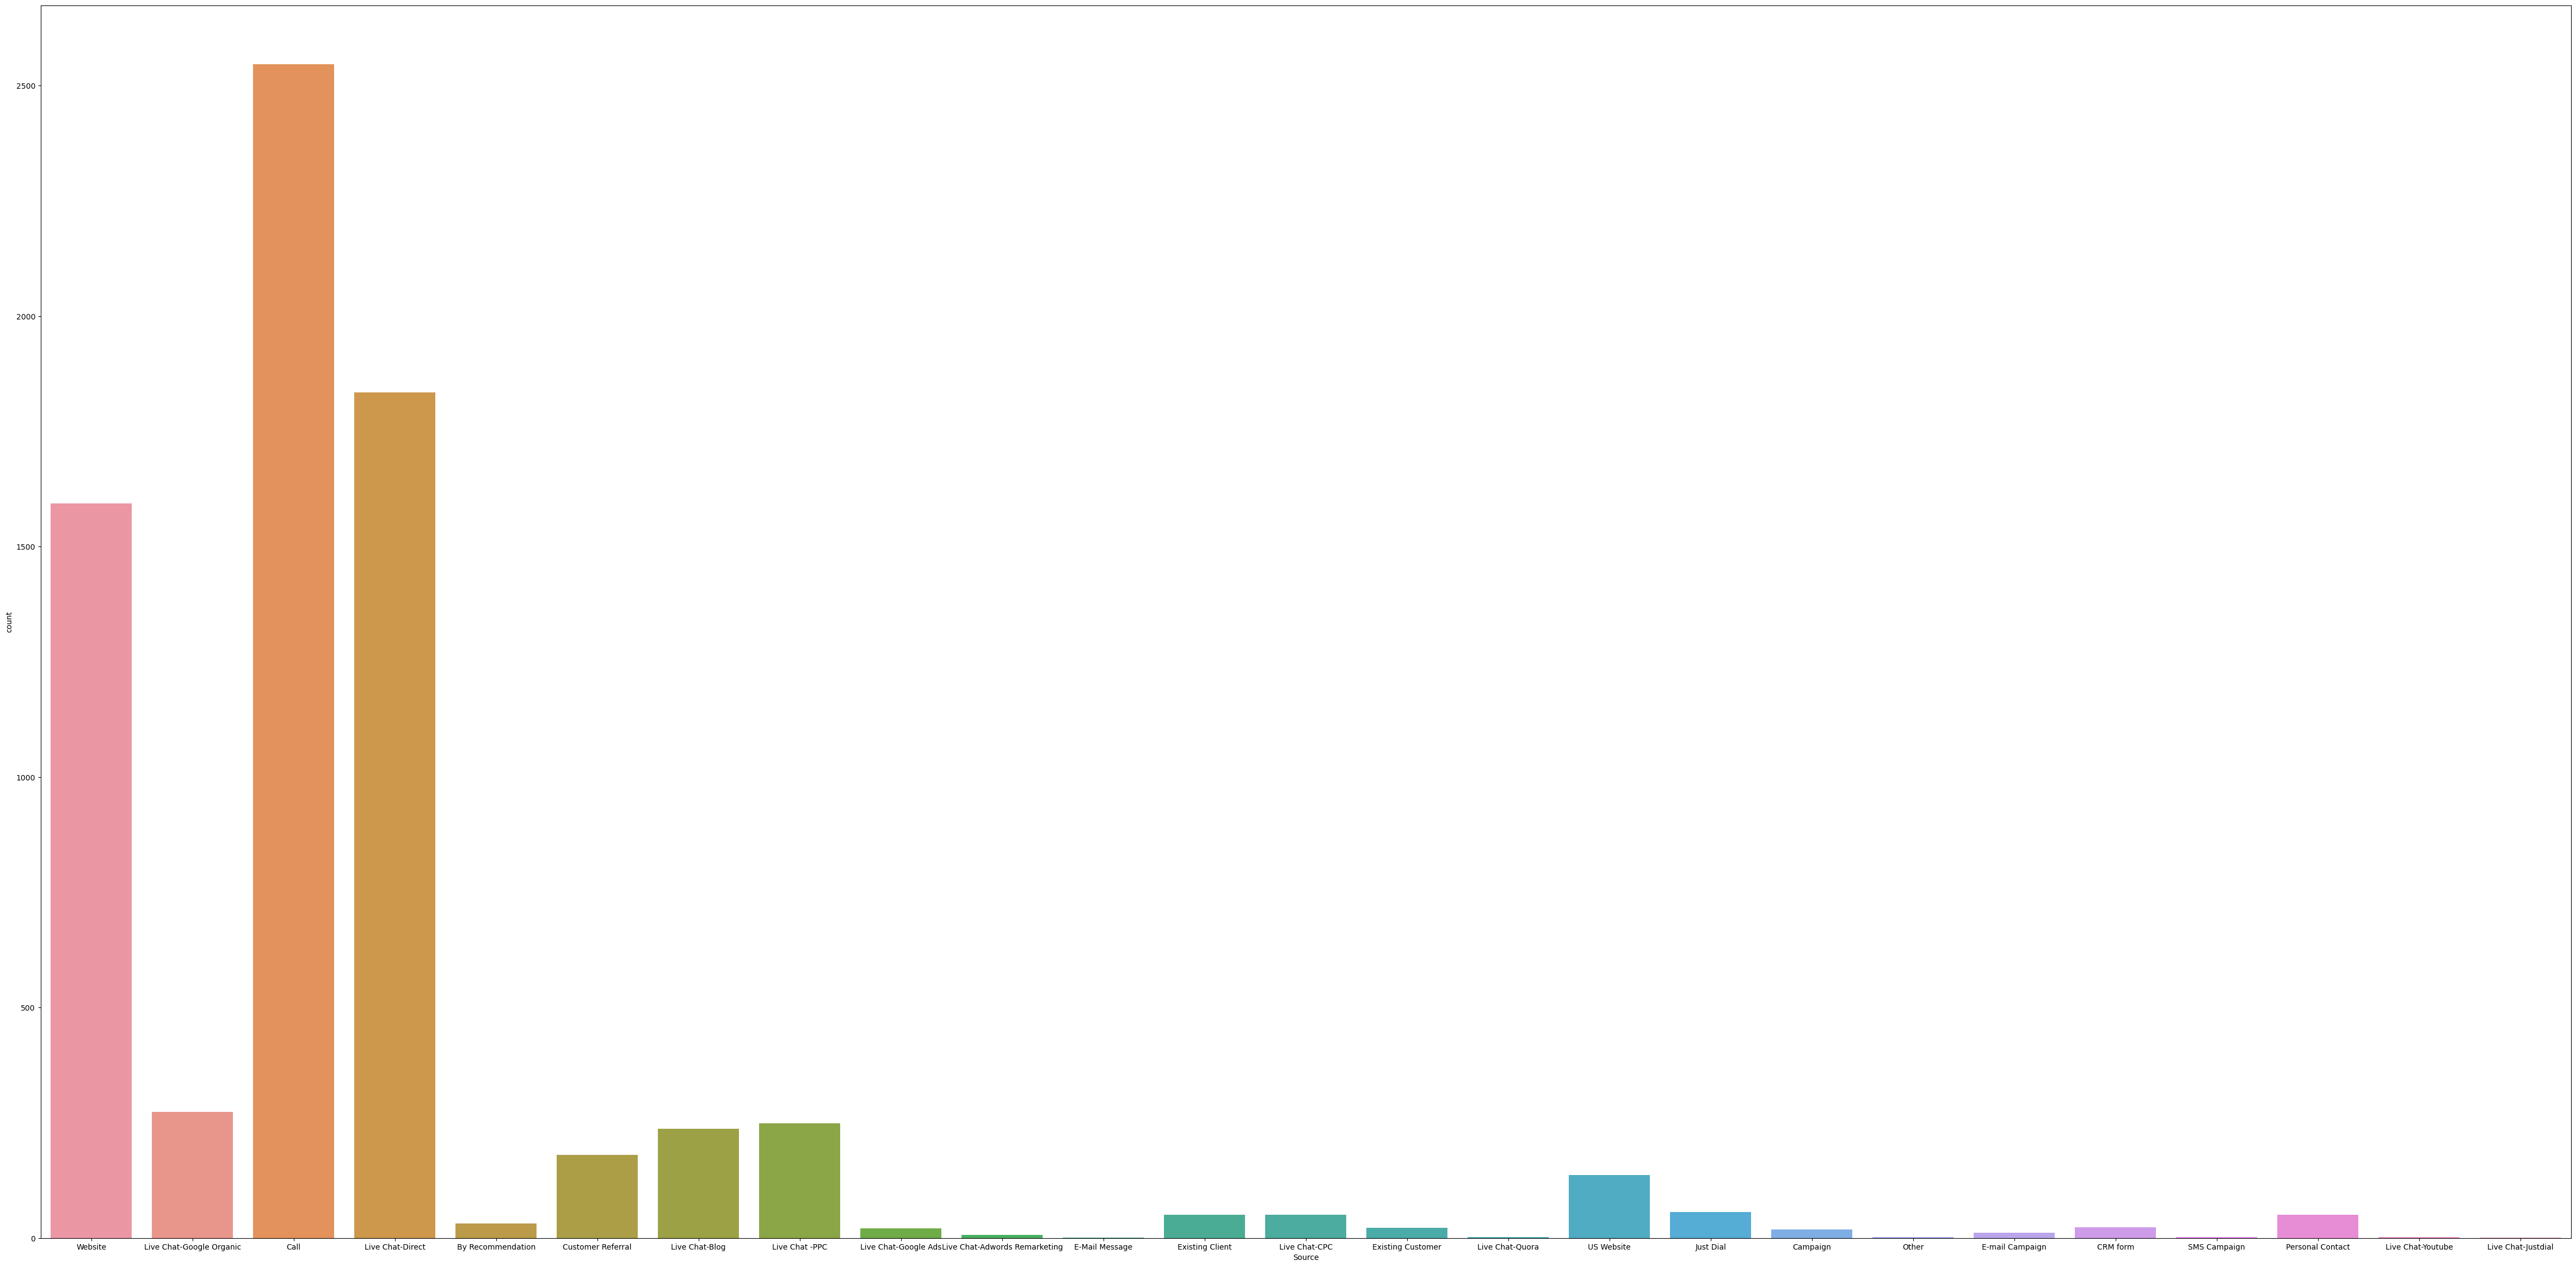

In [11]:
fig = plt.figure(figsize=(60,30), dpi=100)
sns.countplot(x='Source',data=df)

# Delivery mode distribution

<Figure size 2000x2000 with 0 Axes>

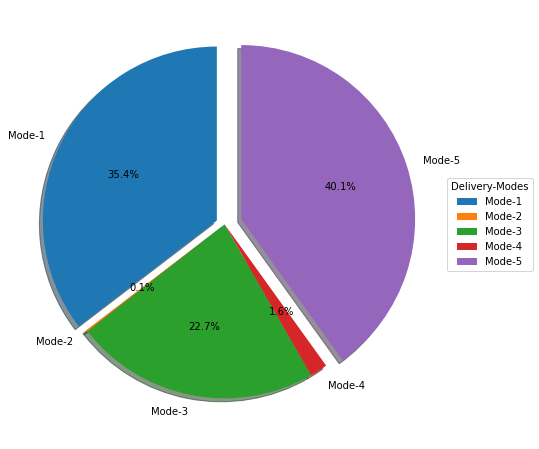

In [12]:
data = df.groupby("Delivery_Mode")["Status"].count()
data

fig = plt.figure(figsize=(20,20), dpi=100)

sizes = [2627, 11, 1688, 121, 2975]
labels = 'Mode-1', 'Mode-2', 'Mode-3', 'Mode-4','Mode-5'
explode = (0.05, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(title="Delivery-Modes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
fig1.set_size_inches(8, 8)


plt.show()

# Dealing with null values

In [21]:
df.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [22]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [23]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# Grouping the status

In [28]:
df.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [24]:
Final_status= []
for i in df["Status"]:
    if (i == 'Open' ) or (i == 'Just Enquiry') or (i == 'In Progress Negative') or (i == 'Not Responding') or (i== 'Junk Lead') or (i =='LOST') :
        Final_status.append("Low Potential")
    else:
        Final_status.append("High Potential") 

In [25]:
df['Final_status'] = Final_status

In [26]:
df.Final_status.unique()

array(['Low Potential', 'High Potential'], dtype=object)

<AxesSubplot:xlabel='Final_status', ylabel='count'>

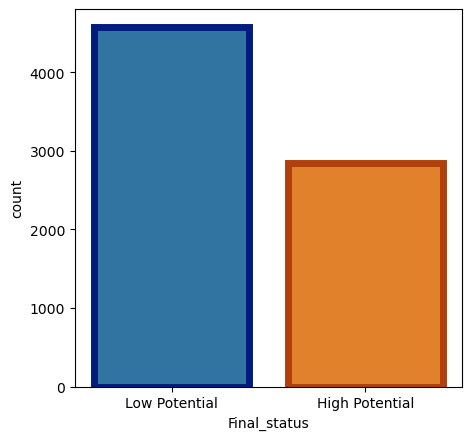

In [38]:
fig = plt.figure(figsize=(5,5), dpi=100)
sns.countplot(x='Final_status', data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

# Grouping the source

In [30]:
df.Source.unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [31]:
Final_source= []
for i in df["Source"]:
    if (i == 'Website' ) or (i == 'US Website') :
        Final_source.append("Website")
    elif (i == 'E-mail Campaign') or (i== 'E-Mail Message'):
        Final_source.append("E-mail")
    elif (i == 'Call'):
        Final_source.append("Call")
    elif (i == 'Live Chat-Direct') or (i== 'Live Chat-Blog') or (i == 'Live Chat -PPC') or (i== 'Live Chat-Google Ads') or (i== 'Live Chat-Adwords Remarketing') or (i== 'Live Chat-Google Organic') or (i =='Live Chat-CPC') or (i== 'Live Chat-Quora') or (i =='Live Chat-Youtube') or (i =='Live Chat-Justdial') or (i=='Just Dial'):
        Final_source.append("Live Chat")  
    elif (i == 'By Recommendation') or (i== 'Customer Referral'):
        Final_source.append("Recommendation")  
    elif (i == 'Existing Client') or (i== 'Existing Customer'):
        Final_source.append("Existing Customer")
    elif (i == 'Campaign'):
        Final_source.append("Campaign")
    elif (i == 'Other'):
        Final_source.append("Other")
    elif (i == 'CRM form'):
        Final_source.append("CRM form")
    elif (i == 'SMS Campaign'):
        Final_source.append("SMS Campaign")
    else:
        Final_source.append("Personal Contact")

In [32]:
df['Final_source'] = Final_source

In [33]:
df['Final_source'].unique()

array(['Website', 'Call', 'Live Chat', 'Recommendation', 'E-mail',
       'Existing Customer', 'Campaign', 'Other', 'CRM form',
       'SMS Campaign', 'Personal Contact'], dtype=object)

<AxesSubplot:xlabel='Final_source', ylabel='count'>

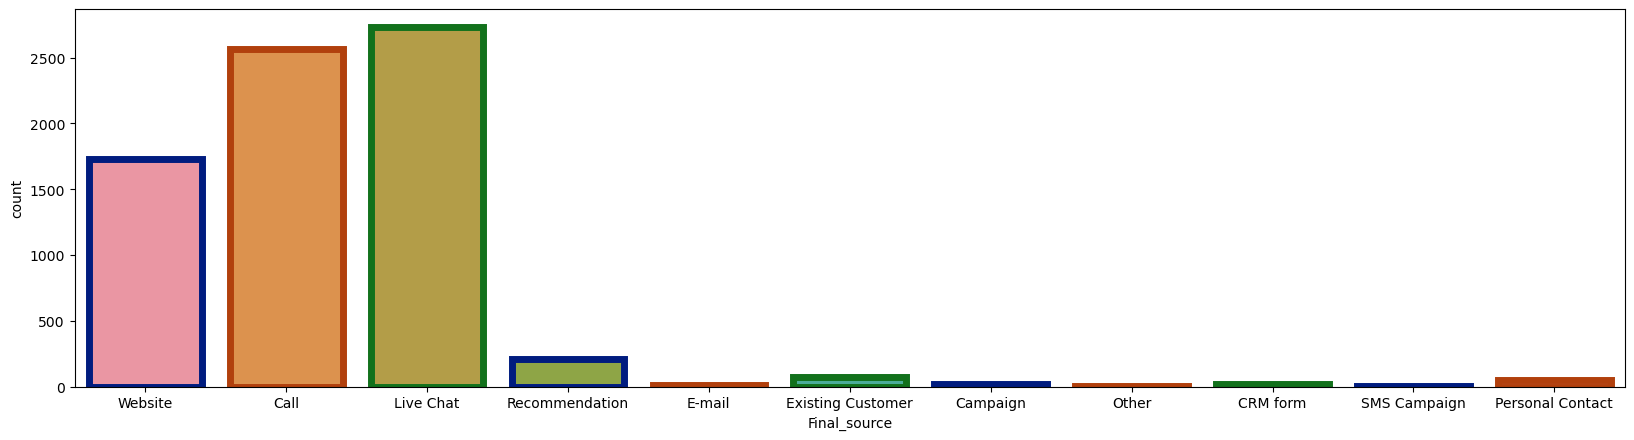

In [43]:
fig = plt.figure(figsize=(20,5), dpi=100)
sns.countplot(x='Final_source', data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

# Grouping the Location

In [34]:
df.Location.unique()

array(['Other Locations', 'Bangalore', 'UAE', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata', 'Singapore',
       'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'], dtype=object)

In [35]:
Final_location= []
for i in df["Location"]:
    if (i == 'Bangalore' ) or (i == 'Trivandrum') or (i == 'Hyderabad') or (i == 'Chennai') or (i == 'Howrah') or (i == 'Kolkata') :
        Final_location.append("South India")
    elif (i == 'UAE') or (i== 'Singapore') or (i== 'Malaysia'):
        Final_location.append("Asia")
    elif (i == 'Other Locations'):
        Final_location.append("Other Locations")
    elif (i == 'Delhi') or (i== 'Mumbai') or (i == 'Pune'):
        Final_location.append("North India")  
    elif (i == 'EUROPE') or (i== 'UK'):
        Final_location.append("EUROPE")  
    elif (i == 'USA'):
        Final_location.append("USA")
    else:
        Final_location.append("AUSTRALIA")

In [36]:
df['Final_location'] = Final_location

<AxesSubplot:xlabel='Final_location', ylabel='count'>

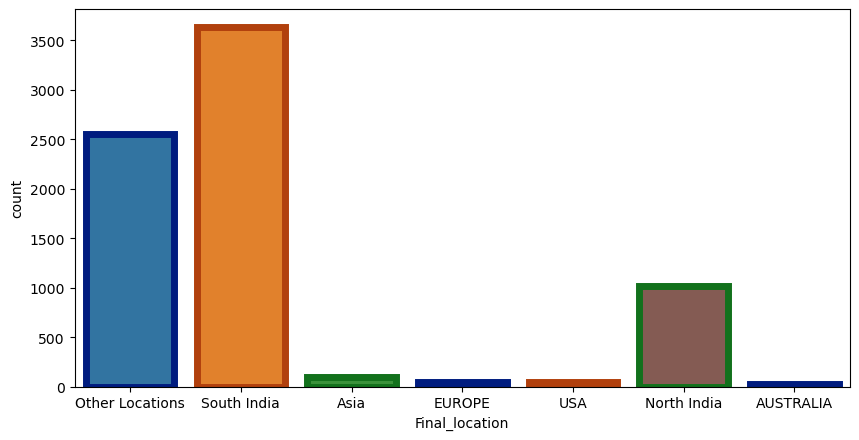

In [45]:
fig = plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='Final_location', data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

# Creating the final data frame for modeling

## Removing 5 fields as they are no use for modeling (Created,Product_ID,Mobile,EMAIL,Status)

In [47]:
df_final=df[['Final_source', 'Sales_Agent','Delivery_Mode', 'Final_status','Final_location']]

In [48]:
df_final.head()

,Final_source,Sales_Agent,Delivery_Mode,Final_status,Final_location
0,Website,Sales-Agent-11,Mode-5,Low Potential,Other Locations
1,Website,Sales-Agent-10,Mode-5,Low Potential,Other Locations
2,Website,Sales-Agent-10,Mode-5,Low Potential,Other Locations
3,Website,Sales-Agent-10,Mode-5,Low Potential,Other Locations
4,Website,Sales-Agent-10,Mode-5,Low Potential,Other Locations


# One hot encoding

### One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [57]:
import category_encoders as ce
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Final_source',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
source_encoded = encoder.fit_transform(df_final)
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Sales_Agent',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
agent_encoded = encoder.fit_transform(source_encoded)
encoder=ce.OneHotEncoder(cols='Delivery_Mode',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
mode_encoded = encoder.fit_transform(agent_encoded)
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Final_location',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
df_final1 = encoder.fit_transform(mode_encoded)

In [59]:
df_final1.head()

,Final_source_Website,Final_source_Call,Final_source_Live Chat,Final_source_Recommendation,Final_source_E-mail,Final_source_Existing Customer,Final_source_Campaign,Final_source_Other,Final_source_CRM form,Final_source_SMS Campaign,...,Delivery_Mode_Mode-2,Delivery_Mode_Mode-4,Final_status,Final_location_Other Locations,Final_location_South India,Final_location_Asia,Final_location_EUROPE,Final_location_USA,Final_location_North India,Final_location_AUSTRALIA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Low Potential,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Low Potential,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Low Potential,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Low Potential,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Low Potential,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_final1.columns

Index(['Final_source_Website', 'Final_source_Call', 'Final_source_Live Chat',
       'Final_source_Recommendation', 'Final_source_E-mail',
       'Final_source_Existing Customer', 'Final_source_Campaign',
       'Final_source_Other', 'Final_source_CRM form',
       'Final_source_SMS Campaign', 'Final_source_Personal Contact',
       'Sales_Agent_Sales-Agent-11', 'Sales_Agent_Sales-Agent-10',
       'Sales_Agent_Sales-Agent-3', 'Sales_Agent_Sales-Agent-4',
       'Sales_Agent_Sales-Agent-9', 'Sales_Agent_Sales-Agent-7',
       'Sales_Agent_Sales-Agent-8', 'Sales_Agent_Sales-Agent-5',
       'Sales_Agent_Sales-Agent-2', 'Sales_Agent_Sales-Agent-12',
       'Sales_Agent_Sales-Agent-1', 'Sales_Agent_Sales-Agent-6',
       'Delivery_Mode_Mode-5', 'Delivery_Mode_Mode-1', 'Delivery_Mode_Mode-3',
       'Delivery_Mode_Mode-2', 'Delivery_Mode_Mode-4', 'Final_status',
       'Final_location_Other Locations', 'Final_location_South India',
       'Final_location_Asia', 'Final_location_EUROPE', 'Fi

# Splitting data into features and targets

In [62]:
X=df_final1[['Final_source_Website', 'Final_source_Call', 'Final_source_Live Chat',
       'Final_source_Recommendation', 'Final_source_E-mail',
       'Final_source_Existing Customer', 'Final_source_Campaign',
       'Final_source_Other', 'Final_source_CRM form',
       'Final_source_SMS Campaign', 'Final_source_Personal Contact',
       'Sales_Agent_Sales-Agent-11', 'Sales_Agent_Sales-Agent-10',
       'Sales_Agent_Sales-Agent-3', 'Sales_Agent_Sales-Agent-4',
       'Sales_Agent_Sales-Agent-9', 'Sales_Agent_Sales-Agent-7',
       'Sales_Agent_Sales-Agent-8', 'Sales_Agent_Sales-Agent-5',
       'Sales_Agent_Sales-Agent-2', 'Sales_Agent_Sales-Agent-12',
       'Sales_Agent_Sales-Agent-1', 'Sales_Agent_Sales-Agent-6',
       'Delivery_Mode_Mode-5', 'Delivery_Mode_Mode-1', 'Delivery_Mode_Mode-3',
       'Delivery_Mode_Mode-2', 'Delivery_Mode_Mode-4',
       'Final_location_Other Locations', 'Final_location_South India',
       'Final_location_Asia', 'Final_location_EUROPE', 'Final_location_USA',
       'Final_location_North India', 'Final_location_AUSTRALIA']]
y=df_final1['Final_status']

# Splitting the data into train test split

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [64]:
y_train.value_counts()

Low Potential     3647
High Potential    2290
Name: Final_status, dtype: int64

<AxesSubplot:xlabel='Final_status', ylabel='count'>

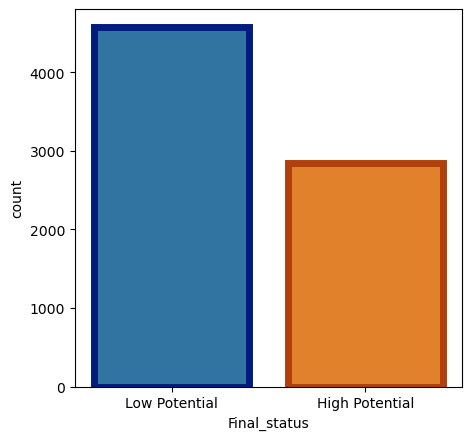

In [65]:
fig = plt.figure(figsize=(5,5), dpi=100)
sns.countplot(x='Final_status', data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

## As we can see above clearly that the tatget is imbalanced so we need to balance the target.

In [69]:
high= df_final1[df_final1["Final_status"]=="High Potential"]
low= df_final1[df_final1["Final_status"]=="Low Potential"]

In [71]:
def train_batch(high,low,start_l,end_l):
    df_train=pd.concat([low[start_l:end_l],high],axis=0)
    
    
    X=df_train[['Final_source_Website', 'Final_source_Call', 'Final_source_Live Chat',
       'Final_source_Recommendation', 'Final_source_E-mail',
       'Final_source_Existing Customer', 'Final_source_Campaign',
       'Final_source_Other', 'Final_source_CRM form',
       'Final_source_SMS Campaign', 'Final_source_Personal Contact',
       'Sales_Agent_Sales-Agent-11', 'Sales_Agent_Sales-Agent-10',
       'Sales_Agent_Sales-Agent-3', 'Sales_Agent_Sales-Agent-4',
       'Sales_Agent_Sales-Agent-9', 'Sales_Agent_Sales-Agent-7',
       'Sales_Agent_Sales-Agent-8', 'Sales_Agent_Sales-Agent-5',
       'Sales_Agent_Sales-Agent-2', 'Sales_Agent_Sales-Agent-12',
       'Sales_Agent_Sales-Agent-1', 'Sales_Agent_Sales-Agent-6',
       'Delivery_Mode_Mode-5', 'Delivery_Mode_Mode-1', 'Delivery_Mode_Mode-3',
       'Delivery_Mode_Mode-2', 'Delivery_Mode_Mode-4',
       'Final_location_Other Locations', 'Final_location_South India',
       'Final_location_Asia', 'Final_location_EUROPE', 'Final_location_USA',
       'Final_location_North India', 'Final_location_AUSTRALIA']]
    y=df_train['Final_status']
    #getting x_train, y_train  
    
    return X_train,y_train

# The 2 training sets are ready

In [72]:
X_train1,y_train1 = train_batch(high,low, 0, 2850)

In [73]:
X_train2,y_train2 = train_batch(high,low, 2850,4573)

# Model 1

## Initializing the model

In [114]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()

## Fitting the model

In [115]:
model1.fit(X_train1,y_train1)
y_predict1= model1.predict(X_test)

## Evaluation of model

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict1)

0.7164983164983165

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_predict1,y_test))

                precision    recall  f1-score   support

High Potential       0.55      0.65      0.59       474
 Low Potential       0.82      0.75      0.78      1011

      accuracy                           0.72      1485
     macro avg       0.68      0.70      0.69      1485
  weighted avg       0.73      0.72      0.72      1485



# Grid search of model 1

In [79]:
from sklearn.model_selection import GridSearchCV

parameters={
    'solver' : ['newton cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C':[.1,.2,.3,.4,.5,1,10,20,50,100,200,300],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet']
}
grid_model1=GridSearchCV(LogisticRegression(),parameters,verbose=2)
grid_model1.fit(X_train1,y_train1)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, s

[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.2, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.2, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................

[CV] END ..................C=0.3, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.3, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.3, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.3, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.3, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.3, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.3, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.3, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................

[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ................C=0.4, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.4, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0

[CV] END ....................C=0.5, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.5, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.3s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ...................

[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, penalty=none, solver=saga; total time=   0.2s
[CV] END ....................C=10, penalty=none, solver=saga; total time=   0.2s
[CV] END ....................C=10, penalty=none, solver=saga; total time=   0.2s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

[CV] END ....................C=20, penalty=none, solver=saga; total time=   0.2s
[CV] END .................C=20, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=20, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=20, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=20, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=20, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=

[CV] END .................C=50, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .................C=50, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .................C=50, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .................C=50, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ...................

[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ................C=1

[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

[CV] END .....................C=300, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=300, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=300, penalty=l1, solver=saga; total time=   0.3s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 20, 50, 100, 200,
                               300],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [80]:
print(grid_model1.best_params_ )
grid_model1.best_score_

{'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}


0.6949649542320141

# Saving the model

In [119]:
import joblib
joblib.dump(model1, "/Users/ayushmehta/Downloads/Capston/Model.pkl")

['/Users/ayushmehta/Downloads/Capston/Model.pkl']

# Model 2

## Initializing the model

In [81]:
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression()

## Fitting the model

In [82]:
model2.fit(X_train2,y_train2)
y_predict2= model.predict(X_test)

## Evaluation of model

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict2)

0.7164983164983165

# Grid search of model 1

In [84]:
from sklearn.model_selection import GridSearchCV

parameters={
    'solver' : ['newton cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C':[.1,.2,.3,.4,.5,1,10,20,50,100,200,300],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet']
}
grid_model2=GridSearchCV(LogisticRegression(),parameters,verbose=2)
grid_model2.fit(X_train2,y_train2)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton cg; total time=   0.0s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, s

[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.2, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.2, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.2, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.2, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.2, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.2, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................

[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.3, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................C=0.3, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.3, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.3, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.3, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.3, penalty=none, solver=saga; total time=   0.2s
[CV] END ................C=0.3, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.3, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0

[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ....................C=0.4, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.4, penalty=none, solver=saga; total time=   0.2s
[CV] END ................C=0.4, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.4, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.4, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.4, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0

[CV] END ....................C=0.5, penalty=none, solver=sag; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ...................C=0.5, penalty=none, solver=saga; total time=   0.2s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ....................C=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.2s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, penalty=none, solver=saga; total time=   0.2s
[CV] END ....................C=10, penalty=none, solver=saga; total time=   0.2s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton cg; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=

[CV] END .................C=20, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=20, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......................C=20, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=20, penalty=l1, solver=saga; total time=   0.3s
[CV] END ...................

[CV] END .................C=50, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=50, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=50, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......................C=50, penalty=l1, solver=saga; total time=   0.3s
[CV] END .................C=

[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ................C=100, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....................C=200, penalty=l1, solver=saga; total time=   0.3s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=200, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

[CV] END .....................C=300, penalty=l1, solver=saga; total time=   0.3s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ................C=300, penalty=l2, solver=newton cg; total time=   0.0s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ................C=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=3

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 20, 50, 100, 200,
                               300],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [85]:
print(grid_model1.best_params_ )
grid_model2.best_score_

{'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}


0.6949649542320141

In [89]:
pred1=grid_model1.predict(X_test)
pred2=grid_model2.predict(X_test)

In [88]:
p1=[]
for i in pred1:
    if i == 'Low Potential':
        p1.append(0)
    else:
        p1.append(1)
p2=[]
for i in pred2:
    if i == 'Low Potential':
        p2.append(0)
    else:
        p2.append(1)
ytest=[]
for i in y_test:
    if i == 'Low Potential':
        ytest.append(0)
    else:
        ytest.append(1)

In [90]:
from statistics import mean, median, mode, stdev
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, median([p1[i], p2[i]]))

In [110]:
final_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [113]:
print(classification_report(final_pred,ytest))

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78      1039
         1.0       0.52      0.65      0.58       446

    accuracy                           0.71      1485
   macro avg       0.68      0.70      0.68      1485
weighted avg       0.74      0.71      0.72      1485



In [93]:
Result=[]
for i in final_pred:
    if i == '0':
        Result.append('Low Potential')
    else:
        Result.append('High Potential')

# Additional

In [132]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [139]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Decision Tree', decisiontree), ('Random Forest', forest)], 
                       voting='soft', weights=[2,1]).fit(X_train1,y_train1)
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(X_test,y_test))

The accuracy for DecisionTree and Random Forest is: 0.696969696969697


In [140]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Logistic regression', LR), ('Random Forest', forest)], 
                       voting='soft', weights=[2,13]).fit(X_train2,y_train2)
print('The accuracy for Logisticregression and Random Forest is:',ensemble.score(X_test,y_test))

The accuracy for Logisticregression and Random Forest is: 0.6996632996632997


In [143]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Logistic regression', LR), ('Random Forest', forest)], 
                       voting='soft', weights=[2,1]).fit(X_train2,y_train2)
print('The accuracy for Logisticregression and Random Forest is:',ensemble.score(X_test,y_test))

The accuracy for Logisticregression and Random Forest is: 0.7164983164983165


# Before feature engineering

In [7]:
pf=pd.read_excel("BEFORE ACCURACY.xlsx")
pf.head()

,Model,Accuracy,F1 score 0,F1 score 1,F1 score 2
0,RF,56,60,57,52
1,LR,50,55,54,34
2,SVC,56,58,57,52
3,KNN,52,56,54,43
4,NB,42,47,52,0


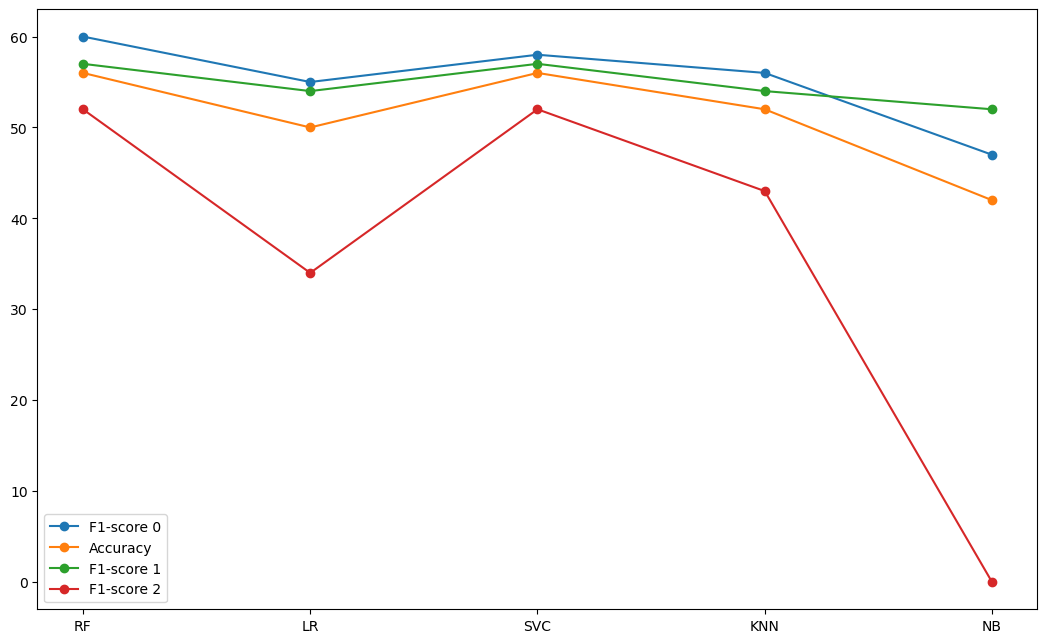

In [8]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_axes([0,0,1,1])

ax.plot(pf.Model, pf['F1 score 0'],label="F1-score 0",marker='o')
ax.plot(pf.Model, pf.Accuracy,label="Accuracy",marker='o')
ax.plot(pf.Model, pf['F1 score 1'],label="F1-score 1",marker='o')
ax.plot(pf.Model, pf['F1 score 2'],label="F1-score 2",marker='o')
ax.plot()
ax.legend()

# After feature engineering

In [4]:
pf=pd.read_excel("AFTER ACCURACY.xlsx")
pf.head()

,Model,Accuracy,F1 score 0,F1 score 1
0,RF,70.10,55,78
1,LR,71.00,78,60
2,SVC,70.84,53,79
3,KNN,69.50,57,77
4,NB,62.90,49,71


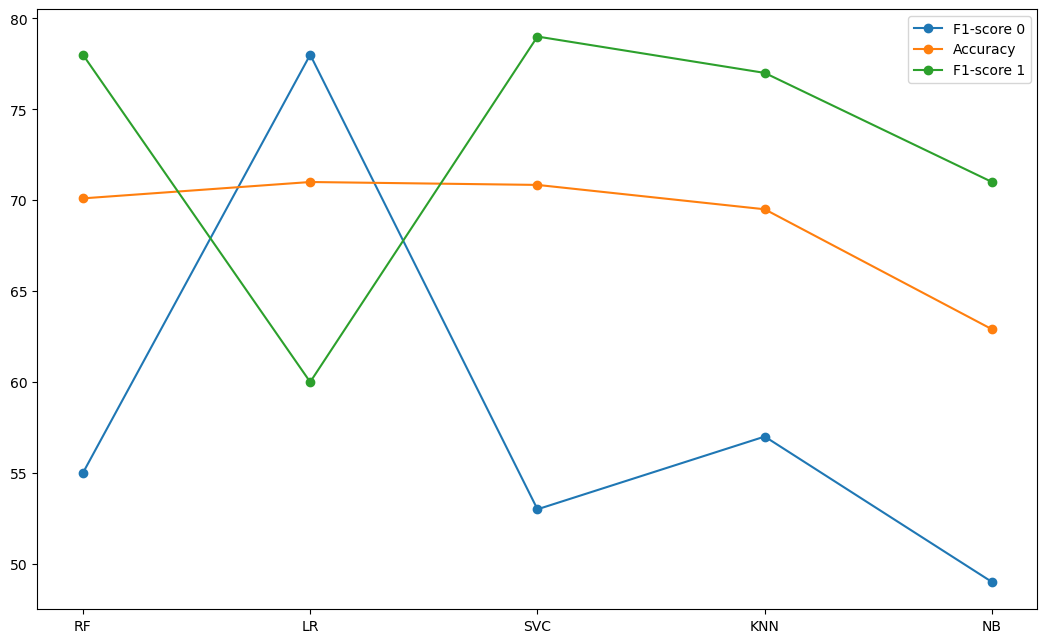

In [6]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_axes([0,0,1,1])

ax.plot(pf.Model, pf['F1 score 0'],label="F1-score 0",marker='o')
ax.plot(pf.Model, pf.Accuracy,label="Accuracy",marker='o')
ax.plot(pf.Model, pf['F1 score 1'],label="F1-score 1",marker='o')
ax.plot()
ax.legend()